# OvO : One vs One

In [167]:
from CLogDKPd import CLogDKPd_MGE, CLogDKPd_MGmB, CLogDKPd_MGE_Ordenado, sigmoid, sinal, grafico_Erro
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [168]:
# carregar dataset
(x_train_original, y_train_original), (x_test_original, y_test_original) = mnist.load_data()

x_train_array = x_train_original.reshape((len(x_train_original), 784))
x_test_array = x_test_original.reshape((len(x_test_original), 784))

x_train_array = x_train_array/255
x_test_array = x_test_array/255

# Normalizar os valores dentro da matriz de cada imagem
# (Sabendo que o valor máximo de cada pixel é 255)
x_train_array = x_train_array.astype('float32')
x_test_array = x_test_array.astype('float32')
print('X shape:', x_train_array.shape)

# Filtrar dataset apenas para digito de 0 a 4
train_filter_0 = np.where(y_train_original == 0)
test_filter_0 = np.where(y_test_original == 0)

train_filter_1 = np.where(y_train_original == 1)
test_filter_1 = np.where(y_test_original == 1)

train_filter_2 = np.where(y_train_original == 2)
test_filter_2 = np.where(y_test_original == 2)

train_filter_3 = np.where(y_train_original == 3)
test_filter_3 = np.where(y_test_original == 3)

x_train_0, y_train_0 = x_train_array[train_filter_0], y_train_original[train_filter_0]
x_test_0, y_test_0 = x_test_array[test_filter_0], y_test_original[test_filter_0]

x_train_1, y_train_1 = x_train_array[train_filter_1], y_train_original[train_filter_1]
x_test_1, y_test_1 = x_test_array[test_filter_1], y_test_original[test_filter_1]

x_train_2, y_train_2 = x_train_array[train_filter_2], y_train_original[train_filter_2]
x_test_2, y_test_2 = x_test_array[test_filter_2], y_test_original[test_filter_2]

x_train_3, y_train_3 = x_train_array[train_filter_3], y_train_original[train_filter_3]
x_test_3, y_test_3 = x_test_array[test_filter_3], y_test_original[test_filter_3]

X shape: (60000, 784)


In [169]:
# ficar só os 100 primeiros de cada classe
def select_first_n_per_class(x, y, n):
    x_selected = []
    y_selected = []
    
    for digit in np.unique(y):
        idx = np.where(y == digit)[0][:n]
        x_selected.append(x[idx])
        y_selected.append(y[idx])
    
    return np.concatenate(x_selected), np.concatenate(y_selected)

In [170]:
x_train_0, y_train_0 = select_first_n_per_class(x_train_0, y_train_0, n=30)
x_test_0, y_test_0 = select_first_n_per_class(x_test_0, y_test_0, n=15)

x_train_1, y_train_1 = select_first_n_per_class(x_train_1, y_train_1, n=30)
x_test_1, y_test_1 = select_first_n_per_class(x_test_1, y_test_1, n=15)

x_train_2, y_train_2 = select_first_n_per_class(x_train_2, y_train_2, n=30)
x_test_2, y_test_2 = select_first_n_per_class(x_test_2, y_test_2, n=15)

x_train_3, y_train_3 = select_first_n_per_class(x_train_3, y_train_3, n=30)
x_test_3, y_test_3 = select_first_n_per_class(x_test_3, y_test_3, n=15)

In [171]:
x_test = np.concatenate([x_test_0,x_test_1,x_test_2,x_test_3])
y_test = np.concatenate([y_test_0,y_test_1,y_test_2,y_test_3])

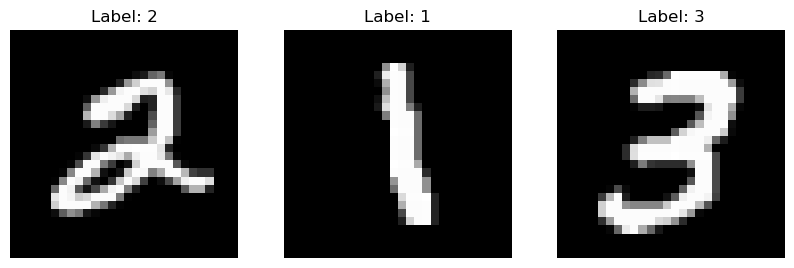

In [172]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for idx, i in enumerate([5, 6, 7]):
        plt.subplot(1, 3, idx + 1)  # Correcting the subplot setup to fit 3 images in 1 row
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Assuming x_train_original and y_train_original are defined
plot_images(x_train_original, y_train_original)

In [173]:
combinacoes = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

In [174]:
# CLogDKPd_MGE -> 1
# CLogDKPd_MGmB -> 2
# CLogDKPd_MGE_Ordenado -> 3

alphas_MGE = []
alphas_MGmB = []
alphas_MGE_Orndenado = []

In [175]:
import numpy as np

def normalize_list(lst):
    np_lst = np.array(lst)
    normalized = (np_lst - np.min(np_lst)) / (np.max(np_lst) - np.min(np_lst))
    return normalized.tolist()

In [176]:
def ovo(num_metodo, batch_size=1):
    alphas = []
    erros = []
    
    eta = 0.5
    epochs = 500
    d=2

    batch_size = batch_size

    if num_metodo == 1: # CLogDKPd_MGE
        for comb in combinacoes:
            x_train = []
            y_train = []
            for i in comb:
                if i == 0:
                    x_train.append(x_train_0)
                    y_train.append(y_train_0)
                elif i == 1:
                    x_train.append(x_train_1)
                    y_train.append(y_train_1)
                elif i==2:
                    x_train.append(x_train_2)
                    y_train.append(y_train_2)
                elif i==3:
                    x_train.append(x_train_3)
                    y_train.append(y_train_3)
            x_train = np.concatenate(x_train)
            y_train = np.concatenate(y_train)
            d=2
            alpha = np.zeros(len(x_train))
            y_train = normalize_list(y_train)
            #print(y_train)
            alpha, E = CLogDKPd_MGE(x_train, y_train, alpha, eta, epochs, d)
            alphas.append(alpha)
            erros.append(E)

    elif num_metodo == 2: # CLogDKPd_MGmB        
        for comb in combinacoes:
            x_train = []
            y_train = []
            for i in comb:
                if i == 0:
                    x_train.append(x_train_0)
                    y_train.append(y_train_0)
                elif i == 1:
                    x_train.append(x_train_1)
                    y_train.append(y_train_1)
                elif i==2:
                    x_train.append(x_train_2)
                    y_train.append(y_train_2)
                elif i==3:
                    x_train.append(x_train_3)
                    y_train.append(y_train_3)
            x_train = np.concatenate(x_train)
            y_train = np.concatenate(y_train)
            alpha = np.zeros(len(x_train))
            y_train = normalize_list(y_train)
            alpha, E = CLogDKPd_MGmB(x_train, y_train, alpha, eta, epochs, d, batch_size)
            alphas.append(alpha)
            erros.append(E)

    elif num_metodo == 3: # CLogDKPd_MGE_Ordenado
        for comb in combinacoes:
            x_train = []
            y_train = []
            for i in comb:
                if i == 0:
                    x_train.append(x_train_0)
                    y_train.append(y_train_0)
                elif i == 1:
                    x_train.append(x_train_1)
                    y_train.append(y_train_1)
                elif i==2:
                    x_train.append(x_train_2)
                    y_train.append(y_train_2)
                elif i==3:
                    x_train.append(x_train_3)
                    y_train.append(y_train_3)
            x_train = np.concatenate(x_train)
            y_train = np.concatenate(y_train)

            alpha = np.zeros(len(x_train))
            y_train = normalize_list(y_train)
            alpha, E = CLogDKPd_MGE_Ordenado(x_train, y_train, alpha, eta, epochs, d)
            alphas.append(alpha)
            erros.append(E)

    else:
        raise ValueError("Método INVÁLIDO! Tente Novamente com um valor entre 1 e ....")

    return alphas, erros

In [177]:
alphas_MGE, erros_MGE = ovo(1)

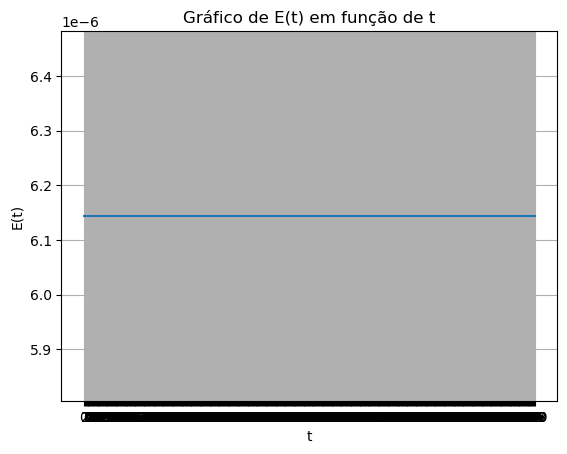

In [178]:
grafico_Erro(erros_MGE[3])

In [179]:
erros_MGE[3][0]

6.144212353328214e-06

In [180]:
A=np.dot(x_test,x_test.T)
d=2
A=A**d
predictions_MGE = []
for n in range(len(x_test)):
    score_imagem = np.zeros(4)
    i=0
    for [v1, v2] in combinacoes:
        alpha = alphas_MGE[i]
        score_temp = sum(alpha * (A[n]) )
        print(score_temp)
        #p_chapeu = sigmoid(sum(alpha * (A[n]) ))
        score_imagem[v1] = score_imagem[v1] + score_temp
        score_imagem[v2] = score_imagem[v2] - score_temp
        #score_imagem.append(score_temp)
        i = i+1
    num, score = max(enumerate(score_imagem), key=lambda x: x[1])
    #comp = combinacoes[num]
    #p_chapeu = sigmoid(score)
    #previsto = comp[sinal(p_chapeu)]
    predictions_MGE.append(num)

40622599.57510076
-240688163.55195686
-155080092.9918323
-173157281.23336884
-142736340.94067577
-625353580.8480948
22758362.209731415
-161461805.41499472
-83324005.17429207
-103300283.79007077
-101152655.21509987
-479428542.87157214
-33533231.100749586
-249755611.42402261
-235907981.39474276
-145552098.9192852
-107024212.42315954
-610910441.9169872
694462.6739720982
-418659592.4900689
-306814614.9022611
-251840934.12843177
-222511788.44010997
-1242452320.0255086
53864189.94734345
-201002034.8124947
-144899050.79180178
-145978713.5017812
-128796923.94145283
-564050959.3675187
18239431.159631655
-147232082.1614303
-124440648.81847733
-106018147.58176245
-74047864.65161669
-380766596.4889193
-10671056.75824398
-163238243.64543894
-101058535.11585128
-88656271.22421405
-70621036.60623834
-351813265.261663
-4880037.483654991
-344605461.66317147
-207916479.581255
-206737820.03495038
-181417661.34431332
-931779620.3395367
-32846704.925695695
-222648294.29038617
-185115060.04246885
-122290677

In [181]:
predictions_MGE

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 0,
 2,
 0,
 0,
 3,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [182]:
alphas_MGmB, erros_MGmB = ovo(2, (2*len(x_train_3)))

[-37094.44921875 -40591.1875     -31518.0234375  -40278.640625
 -62986.61328125 -53210.0625     -53190.8515625  -13480.60351562
 -53148.6015625  -39635.66015625 -45837.05078125 -38157.6171875
 -50535.0390625  -17785.01171875 -50484.40234375 -24663.81445312
 -53275.00390625 -51467.609375   -22939.984375   -44650.9609375
 -36424.34375    -39139.25390625 -44109.4765625  -11775.04882812
 -22528.99804688 -40433.15234375  -7662.29101562 -25502.3046875
 -11160.36230469 -34164.09765625   5163.07519531   4199.14404297
   2739.27563477   3296.63696289   4918.703125    -3036.0456543
   4928.77832031   4720.91845703   5249.90429688   -662.98327637
   3580.69433594   5496.62890625   6795.71044922   4075.25708008
   3304.70605469   1948.01635742   6484.47363281   4305.32226562
   5963.53320312   2658.41162109   6616.34033203   -484.2076416
   4347.91796875   4069.16674805   7134.30908203   4039.171875
   3762.39086914   4568.7578125    4659.20019531   6805.03613281]
[-28721.02148438 -28236.68554688 

In [183]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)

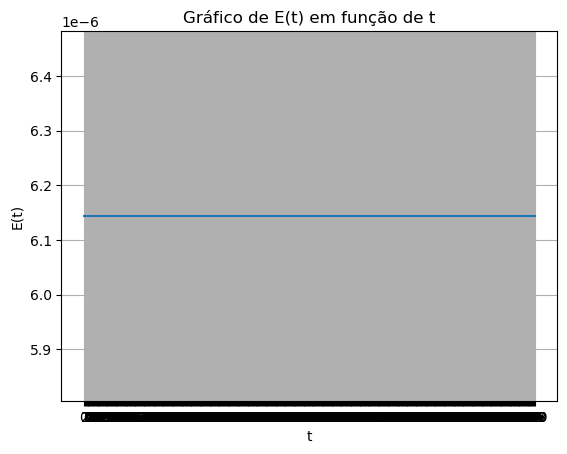

In [184]:
grafico_Erro(erros_MGmB[0])

In [185]:
alphas_MGE_Ordenado, erros_MGE_Ordenado = ovo(3)

KeyboardInterrupt: 

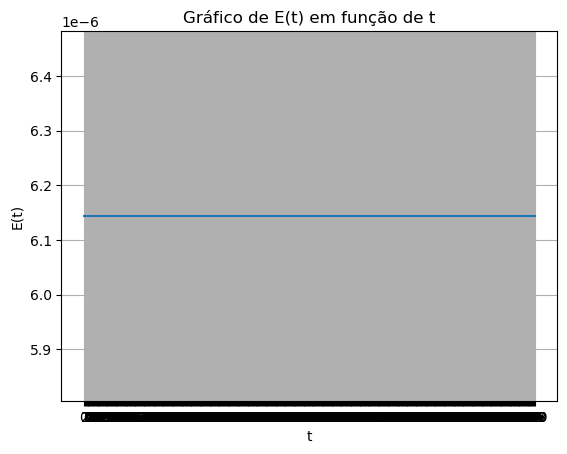

In [ ]:
grafico_Erro(erros_MGE_Ordenado[0])